# Importando bibliotecas

In [1]:
# biblotecas para manipulação de dados
import pandas as pd
import numpy as np

#Bibliotecas auxiliares
import os
from functools import reduce
import re
import matplotlib.pyplot as plt
import unidecode

#Biblioteca propria
import sys
sys.path.append("../src/")
from eda.eda import describe
from io_pyarrow.io_pyarrow import pyarrow_read_csv,write_table_from_pandas #leitura e escrita de arquivos csv grandes

%matplotlib inline
%reload_ext watermark
%watermark --iversions

numpy     : 1.20.1
matplotlib: 3.3.3
re        : 2.2.1
unidecode : 1.2.0
pandas    : 1.2.2
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]



___

# Importando arquivos

In [2]:
#Definindo path dos arquivos
path_data = "../data/raw/"

## OpenData SUS
fonte: https://opendatasus.saude.gov.br/dataset

In [5]:
ocupacao_leitos = pyarrow_read_csv(path_data + "OpenDataSUS/esus-vepi.LeitoOcupacao.csv",sep=",")

___

# Analisando as bases de dados

In [6]:
describe(ocupacao_leitos)

Quantidade de linhas: 895946


variable            type    na na_pct  unique  \
0                     _id          object     0   0.0%  895946   
1         dataNotificacao  datetime64[ns]     6   0.0%  494366   
2                    cnes          object     0   0.0%    4013   
3     ocupacaoSuspeitoCli         float64  1404  0.16%    1117   
4     ocupacaoSuspeitoUti         float64  1404  0.16%     549   
5   ocupacaoConfirmadoCli         float64  1403  0.16%     587   
6   ocupacaoConfirmadoUti         float64  1403  0.16%     484   
7     saidaSuspeitaObitos         float64   110  0.01%     160   
8      saidaSuspeitaAltas         float64   110  0.01%     323   
9   saidaConfirmadaObitos         float64    18   0.0%     251   
10   saidaConfirmadaAltas         float64    19   0.0%     647   
11                 origem          object     0   0.0%      13   
12             _p_usuario          object     0   0.0%    3422   
13      estadoNotificacao          object     0   0.0%      28   
14   municipioNotificacao          object     0   0.0%    2330   
15                 estado          object     0   0.0%      29   
16              municipio          object     0   0.0%    2331   
17               excluido            bool     0   0.0%       2   
18               validado            bool     0   0.0%       1   
19            _created_at  datetime64[ns]     0   0.0%  895918   
20            _updated_at  datetime64[ns]     0   0.0%  895937   

                           min                         quat25  \
0                            -                              -   
1          1921-02-19 03:00:00  2020-08-14 03:00:37.910749952   
2                            -                              -   
3                      -1109.0                            0.0   
4                         -9.0                            0.0   
5                        -10.0                            0.0   
6                         -7.0                            0.0   
7                        -10.0                            0.0   
8                        -17.0                            0.0   
9                        -11.0                            0.0   
10                       -13.0                            0.0   
11                           -                              -   
12                           -                              -   
13                           -                              -   
14                           -                              -   
15                           -                              -   
16                           -                              -   
17                       False                            0.0   
18                       False                            0.0   
19  2020-04-15 13:44:30.085000  2020-08-20 11:09:23.916499968   
20  2020-04-15 17:35:07.999000  2020-08-29 11:17:36.006250240   

                           median                           mean  \
0                               -                              -   
1             2020-11-12 03:00:00  2020-11-15 01:16:26.785028352   
2                               -                              -   
3                             3.0                     126.439256   
4                             0.0                       7.581657   
5                             2.0                       7.864017   
6                             0.0                       6.164803   
7                             0.0                       0.218652   
8                             0.0                      32.119117   
9                             0.0                       0.531679   
10                            0.0                       1.635961   
11                              -                              -   
12                              -                              -   
13                              -                              -   
14                              -                              -   
15                              -            

In [7]:
ocupacao_leitos.head()

_id         dataNotificacao       cnes  ocupacaoSuspeitoCli  \
0  p5Ez41Zu6B 2020-04-14 03:00:00.000    2303167                  0.0   
1  eUOMsSt7T7 2020-04-15 03:00:00.000  5935377\t                  1.0   
2  QaG4oIBrMa 2020-04-15 14:57:16.255    0012599                 15.0   
3  ifya31F3ZF 2020-03-24 03:00:00.000    2562871                  9.0   
4  dkurDhelx9 2020-04-01 03:00:00.000    2252228                 26.0   

   ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  \
0                  0.0                    0.0                    0.0   
1                  0.0                    0.0                    0.0   
2                  1.0                    3.0                    2.0   
3                  0.0                    1.0                    0.0   
4                  0.0                    1.0                    0.0   

   saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  ...  \
0                  0.0                 0.0                    0.0  ...   
1                  0.0                 1.0                    0.0  ...   
2                  0.0                 0.0                    0.0  ...   
3                  0.0                 0.0                    0.0  ...   
4                  0.0                 0.0                    0.0  ...   

          origem        _p_usuario  estadoNotificacao municipioNotificacao  \
0  aplicacao-web  _User$auVMjEVEVz     Santa Catarina              Itapema   
1    parse-cloud  _User$WBa5nfe9P9     Rio de Janeiro       Rio de Janeiro   
2    parse-cloud  _User$6oxZQHBPQ7     Rio de Janeiro              Niterói   
3    parse-cloud  _User$fhufIbmR9C              Ceará        Várzea Alegre   
4    parse-cloud  _User$tkAdHTNhC9  Rio Grande do Sul            Encantado   

              estado       municipio excluido  validado  \
0     Santa Catarina         Itapema     True     False   
1     Rio de Janeiro  Rio de Janeiro    False     False   
2     Rio de Janeiro         Niterói    False     False   
3              Ceará   Várzea Alegre    False     False   
4  Rio Grande do Sul       Encantado    False     False   

              _created_at             _updated_at  
0 2020-04-15 13:44:30.085 2020-04-16 13:56:13.656  
1 2020-04-15 13:50:47.256 2020-08-01 20:08:13.116  
2 2020-04-15 15:20:57.033 2020-08-01 20:02:12.729  
3 2020-04-15 16:58:32.839 2020-08-01 21:40:37.624  
4 2020-04-15 17:02:53.877 2020-08-01 21:37:53.664  

[5 rows x 21 columns]

In [6]:
ocupacao_ = ocupacao_leitos.copy()

## dataNotificacao

In [7]:
#Temos datas de 1921. Vamos verificar o histórico
ocupacao_.dataNotificacao.describe()

C:\Users\ohbto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                         895940
unique                        494366
top              2020-07-19 03:00:00
freq                            1130
first            1921-02-19 03:00:00
last      2021-05-30 05:00:58.791000
Name: dataNotificacao, dtype: object

In [8]:
ocupacao_.dataNotificacao.dt.year.value_counts(dropna=False).sort_index()

1921.0         1
1982.0         1
1983.0         2
1984.0         1
1985.0         2
1987.0         1
1988.0         1
1989.0         2
1990.0         4
1991.0         1
1995.0         1
1997.0         1
2000.0         8
2001.0         2
2002.0        10
2003.0         1
2008.0         1
2010.0        16
2011.0         8
2012.0        10
2013.0         1
2014.0         2
2015.0         2
2017.0         2
2018.0         1
2019.0        14
2020.0    553401
2021.0    342443
NaN            6
Name: dataNotificacao, dtype: int64

In [9]:
#Os dados que nos interessam são apenas aqueles de 2020 e 2021
ocupacao_ = ocupacao_[ocupacao_.dataNotificacao.dt.year >= 2020].reset_index(drop=True)

## ocupacaoSuspeitoCli

<AxesSubplot:>

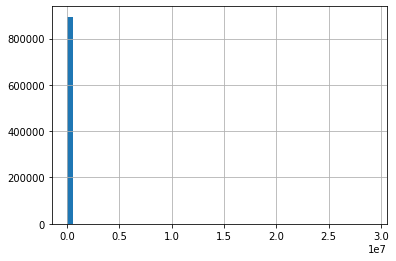

In [10]:
#Pelo describe, temos valores negativos e muito grandes de ocupação. Vamos investigar
ocupacao_.ocupacaoSuspeitoCli.hist(bins=50)

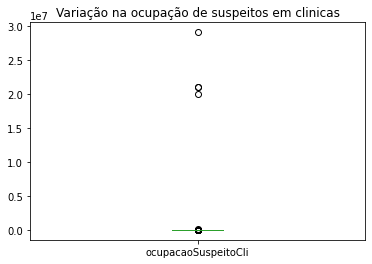

In [16]:
ocupacao_.ocupacaoSuspeitoCli.plot(kind = "box")
plt.title("Variação na ocupação de suspeitos em clinicas")
plt.show()

In [21]:
#mais de 10.000 pessoas num hospital não pode estar correto. Vamos remover esses casos
ocupacao_[ocupacao_.ocupacaoSuspeitoCli > 1e4]

_id         dataNotificacao     cnes  ocupacaoSuspeitoCli  \
81711   hDOJTaNC9I 2020-06-22 17:17:39.747  2168200           20062020.0   
164132  i1Ak4C5KMN 2020-07-21 03:00:00.000  2139030           21072020.0   
227166  uQ2pxcIhFX 2020-08-20 03:00:00.000  2587734           21082020.0   
254563  N73hatigyU 2020-08-31 03:00:11.162  2686945           29082020.0   
592937  459dGhOJmC 2020-11-21 03:00:00.000  2576341             130144.0   
724120  rNTcXbmwes 2020-02-01 03:00:00.000  2006510              30864.0   

        ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  \
81711                   0.0                    1.0                    0.0   
164132                  0.0                    0.0                    0.0   
227166                  0.0                    1.0                    0.0   
254563                 41.0                    0.0                    0.0   
592937                 52.0                    3.0                    8.0   
724120                 64.0                   30.0                   21.0   

        saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  ...  \
81711                   0.0                 0.0                    0.0  ...   
164132                  0.0                 0.0                    0.0  ...   
227166                  0.0                 0.0                    0.0  ...   
254563                  0.0                 0.0                    0.0  ...   
592937                  0.0                 0.0                    0.0  ...   
724120                  2.0                 2.0                    0.0  ...   

             origem        _p_usuario estadoNotificacao municipioNotificacao  \
81711   parse-cloud  _User$QxYX9fjL0T      Minas Gerais             Passabém   
164132  parse-cloud  _User$RyiIJ6hG7O      Minas Gerais               Medina   
227166  parse-cloud  _User$uY271PGYZ7            Paraná             Ivaiporã   
254563  parse-cloud  _User$eS04uzEdX3            Paraná         Ponta Grossa   
592937  parse-cloud  _User$UnQl1ST2HJ            Paraná            Arapongas   
724120  parse-cloud  _User$Qa7huQ6v6R           Alagoas               Maceió   

              estado     municipio excluido  validado             _created_at  \
81711   Minas Gerais      Passabém    False     False 2020-06-22 17:19:39.477   
164132  Minas Gerais        Medina    False     False 2020-07-28 21:21:08.423   
227166        Paraná      Ivaiporã    False     False 2020-08-21 12:31:08.521   
254563        Paraná  Ponta Grossa    False     False 2020-08-31 10:53:21.986   
592937        Paraná     Arapongas    False     False 2021-01-22 12:47:44.300   
724120       Alagoas        Maceió    False     False 2021-03-22 21:15:20.710   

                   _updated_at  
81711  2020-08-01 00:29:35.073  
164132 2020-07-31 15:55:24.824  
227166 2020-08-21 12:31:08.521  
254563 2020-08-31 10:53:21.986  
592937 2021-01-22 12:47:44.300  
724120 2021-03-22 21:15:20.710  

[6 rows x 21 columns]

In [23]:
ocupacao_ = ocupacao_[ocupacao_.ocupacaoSuspeitoCli < 1e4]

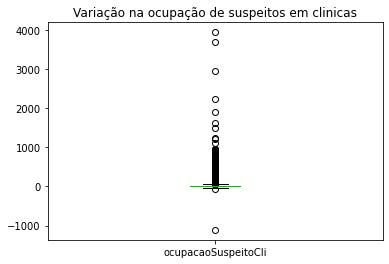

In [24]:
ocupacao_.ocupacaoSuspeitoCli.plot(kind = "box")
plt.title("Variação na ocupação de suspeitos em clinicas")
plt.show()

In [25]:
# Existem casos negativos de ocupação
ocupacao_[ocupacao_.ocupacaoSuspeitoCli < 0]

_id         dataNotificacao     cnes  ocupacaoSuspeitoCli  \
8901    GKug23pMBY 2020-04-29 12:15:32.942  2611635                 -2.0   
9146    XaiotVg1vn 2020-04-03 03:00:00.000  2017997                 -1.0   
9152    XI5bkoclEa 2020-04-04 03:00:00.000  2017997                 -1.0   
9154    7S1tU7cUuF 2020-04-05 03:00:00.000  2017997                 -1.0   
9156    SbFGrRkjoV 2020-04-06 03:00:00.000  2017997                 -1.0   
...            ...                     ...      ...                  ...   
477770  7p14ku1CEo 2020-11-28 03:00:53.648  2498804                 -1.0   
621287  bVDD0YnEh1 2021-01-18 03:00:00.000  2742020                -13.0   
632788  JpDw3HO0Uu 2021-02-10 03:00:44.315  2200481                 -1.0   
743075  1LDsOJNppM 2021-03-18 03:00:00.000  2275562              -1109.0   
855820  jwr6qCPYe6 2021-03-09 04:00:00.000  2493888                 -1.0   

        ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  \
8901                    0.0                   -2.0                    0.0   
9146                    0.0                    0.0                    0.0   
9152                    0.0                    0.0                    0.0   
9154                    0.0                    0.0                    0.0   
9156                    0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
477770                  0.0                    2.0                    0.0   
621287                  0.0                    0.0                    0.0   
632788                 -1.0                    0.0                   -1.0   
743075                 27.0                   25.0                   15.0   
855820                  0.0                    0.0                   32.0   

        saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  ...  \
8901                    0.0                 0.0                    0.0  ...   
9146                    0.0                 0.0                    0.0  ...   
9152                    0.0                 0.0                    0.0  ...   
9154                    0.0                 0.0                    0.0  ...   
9156                    0.0                 0.0                    0.0  ...   
...                     ...                 ...                    ...  ...   
477770                  0.0                 0.0                    0.0  ...   
621287                  0.0                 0.0                    0.0  ...   
632788                  0.0                 0.0                    0.0  ...   
743075                  0.0                 1.0                    1.0  ...   
855820                  0.0                 0.0                    3.0  ...   

             origem        _p_usuario estadoNotificacao municipioNotificacao  \
8901    parse-cloud  _User$JzRiwd8BuO             Ceará          Brejo Santo   
9146    parse-cloud  _User$H66iZ1pyVc          Amazonas              Guajará   
9152    parse-cloud  _User$H66iZ1pyVc          Amazonas              Guajará   
9154    parse-cloud  _User$H66iZ1pyVc          Amazonas              Guajará   
9156    parse-cloud  _User$H66iZ1pyVc          Amazonas              Guajará   
...             ...               ...               ...                  ...   
477770  parse-cloud  _User$XkOElXVSvO             Bahia               Mucuri   
621287  parse-cloud  _User$HlU6nnuCJb            Paraná               Candói   
632788  parse-cloud  _User$PxmZ8IHoEK      Minas Gerais     Conselheiro Pena   
743075  parse-cloud  _User$QRhUGWokZv    Rio de Janeiro           Petrópolis   
855820  parse-cloud  _User$FwIGvCCUWl          Rondônia          Porto Velho   

                estado         municipio excluido  validado  \
8901             Ceará       Brejo Santo    False     False   
9146          Amazonas           Guajará    False     False   
9152          Amazonas           Guajará    False     False   
9154          A

<AxesSubplot:>

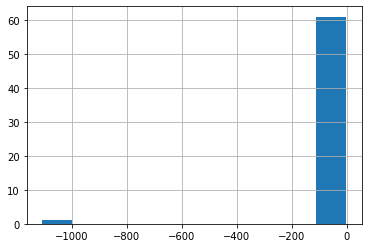

In [28]:
# Vamos considerar que esses casos foram inseridos erroneamente negativos. Vamos apesar alterar esses valores para positivos
ocupacao_[ocupacao_.ocupacaoSuspeitoCli < 0].ocupacaoSuspeitoCli.hist()

In [29]:
ocupacao_.ocupacaoSuspeitoCli = np.abs(ocupacao_.ocupacaoSuspeitoCli)

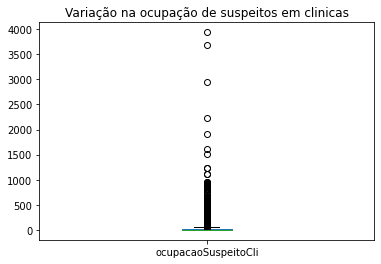

In [31]:
ocupacao_.ocupacaoSuspeitoCli.plot(kind = "box")
plt.title("Variação na ocupação de suspeitos em clinicas")
plt.show()

## ocupacaoSuspeitoUti

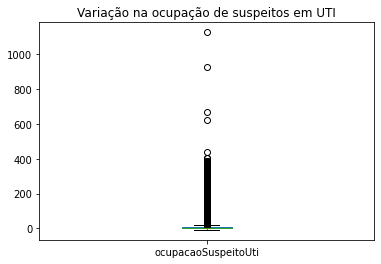

In [32]:
ocupacao_.ocupacaoSuspeitoUti.plot(kind='box')
plt.title("Variação na ocupação de suspeitos em UTI")
plt.show()

<AxesSubplot:>

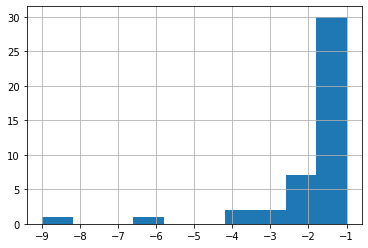

In [37]:
ocupacao_[ocupacao_.ocupacaoSuspeitoUti < 0].ocupacaoSuspeitoUti.hist()

In [38]:
#Faremos a mesma conversão: alterando de negativo para positivo
ocupacao_.ocupacaoSuspeitoUti = np.abs(ocupacao_.ocupacaoSuspeitoUti)

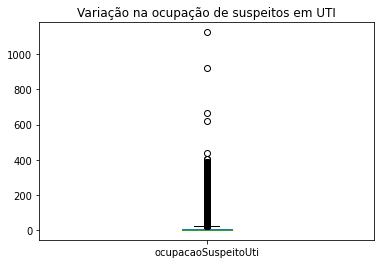

In [39]:
ocupacao_.ocupacaoSuspeitoUti.plot(kind='box')
plt.title("Variação na ocupação de suspeitos em UTI")
plt.show()

## ocupacaoConfirmadoCli

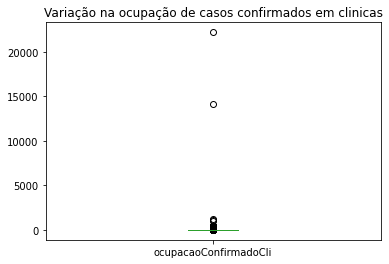

In [42]:
ocupacao_.ocupacaoConfirmadoCli.plot(kind = "box")
plt.title("Variação na ocupação de casos confirmados em clinicas")
plt.show()

In [45]:
#Mais de 10.000 pessoas internadas
ocupacao_.query("ocupacaoConfirmadoCli > 10e3")

_id         dataNotificacao     cnes  ocupacaoSuspeitoCli  \
133209  JvutDNhWLE 2020-07-15 16:28:15.000  2570300                  2.0   
581084  x05LKdrjNw 2021-01-17 03:00:01.645  2465825                 32.0   

        ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  \
133209                  0.0                22222.0                    0.0   
581084                  8.0                14110.0                   10.0   

        saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  ...  \
133209                  0.0                 0.0                    0.0  ...   
581084                  0.0                 0.0                    2.0  ...   

             origem        _p_usuario estadoNotificacao municipioNotificacao  \
133209  parse-cloud  _User$HzwsO90KQW             Goiás  Valparaíso de Goiás   
581084  parse-cloud  _User$8Wgm7WO723    Espírito Santo             Linhares   

                estado            municipio excluido  validado  \
133209           Goiás  Valparaíso de Goiás    False     False   
581084  Espírito Santo             Linhares    False     False   

                   _created_at             _updated_at  
133209 2020-07-16 08:20:15.640 2020-07-31 17:03:22.379  
581084 2021-01-17 18:02:50.087 2021-01-17 18:02:50.087  

[2 rows x 21 columns]

In [47]:
#Vamos denconsiderar esses casos
ocupacao_ = ocupacao_.query("ocupacaoConfirmadoCli < 10e3")

In [50]:
#Vamos verificar se existem casos negativos
ocupacao_.query("ocupacaoConfirmadoCli < 0").shape

(28, 21)

In [52]:
#Vamos fazer a conversão para positivo
ocupacao_.ocupacaoConfirmadoCli = ocupacao_.ocupacaoConfirmadoCli.abs()

## ocupacaoConfirmadoUti

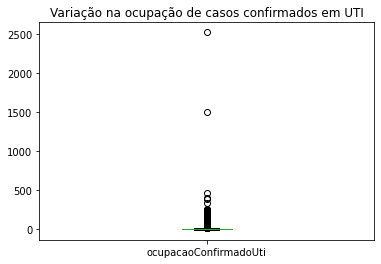

In [53]:
ocupacao_.ocupacaoConfirmadoUti.plot(kind = "box")
plt.title("Variação na ocupação de casos confirmados em UTI")
plt.show()

In [54]:
#Existem casos negativos que deveremos tratar
(ocupacao_.ocupacaoConfirmadoUti < 0).value_counts()

False    894360
True         77
Name: ocupacaoConfirmadoUti, dtype: int64

<AxesSubplot:>

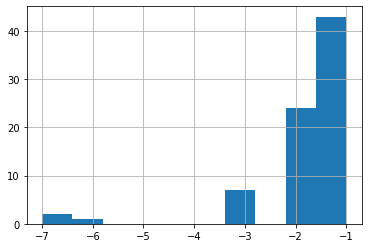

In [57]:
ocupacao_[ocupacao_.ocupacaoConfirmadoUti < 0].ocupacaoConfirmadoUti.hist()

In [58]:
ocupacao_.ocupacaoConfirmadoUti = ocupacao_.ocupacaoConfirmadoUti.abs()

## saidaSuspeitaObitos

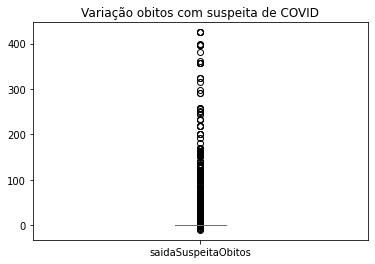

In [60]:
ocupacao_.saidaSuspeitaObitos.plot(kind = "box")
plt.title("Variação obitos com suspeita de COVID")
plt.show()

<AxesSubplot:>

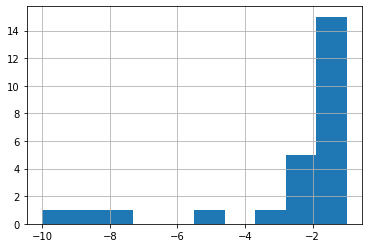

In [62]:
#Vamos pegar o modulo desses valores
ocupacao_[ocupacao_.saidaSuspeitaObitos < 0].saidaSuspeitaObitos.hist()

In [63]:
ocupacao_.saidaSuspeitaObitos = ocupacao_.saidaSuspeitaObitos.abs()

## saidaSuspeitaAltas

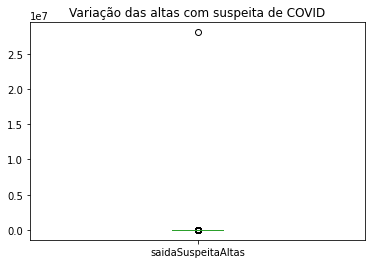

In [66]:
ocupacao_.saidaSuspeitaAltas.plot(kind = "box")
plt.title("Variação das altas com suspeita de COVID")
plt.show()

In [68]:
#Vamos remover esse ponto com mais de 20 milhoes
ocupacao_ = ocupacao_[ocupacao_.saidaSuspeitaAltas < 2e7]

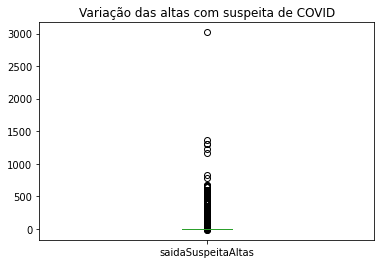

In [69]:
ocupacao_.saidaSuspeitaAltas.plot(kind = "box")
plt.title("Variação das altas com suspeita de COVID")
plt.show()

<AxesSubplot:>

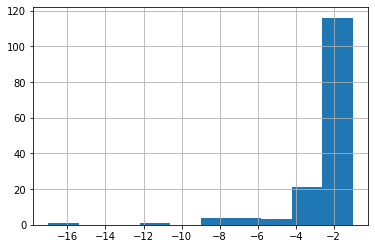

In [71]:
#Verificando casos negativos
ocupacao_[ocupacao_.saidaSuspeitaAltas < 0].saidaSuspeitaAltas.hist()

In [73]:
# Conversão para numero absoluto
ocupacao_.saidaSuspeitaAltas = ocupacao_.saidaSuspeitaAltas.abs()

## saidaConfirmadaObitos

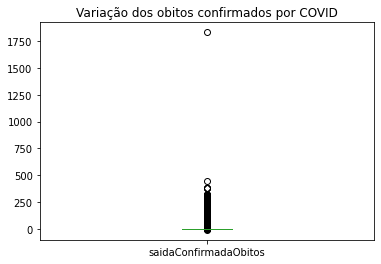

In [74]:
ocupacao_.saidaConfirmadaObitos.plot(kind = "box")
plt.title("Variação dos obitos confirmados por COVID")
plt.show()

<AxesSubplot:>

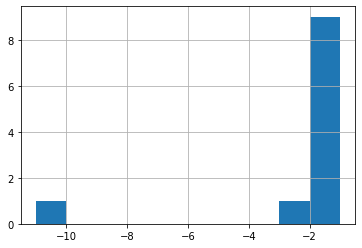

In [75]:
#Verificando casos negativos
ocupacao_[ocupacao_.saidaConfirmadaObitos < 0].saidaConfirmadaObitos.hist()

In [76]:
ocupacao_.saidaConfirmadaObitos = ocupacao_.saidaConfirmadaObitos.abs()

## saidaConfirmadaAltas

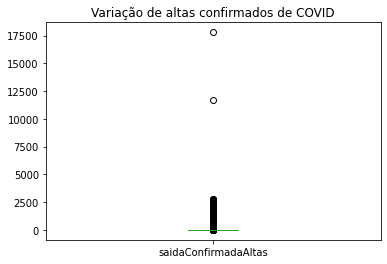

In [77]:
ocupacao_.saidaConfirmadaAltas.plot(kind = "box")
plt.title("Variação de altas confirmados de COVID")
plt.show()

In [78]:
#Vamos remover esses dois pontos com mais de 10k confirmações
ocupacao_[ocupacao_.saidaConfirmadaAltas > 10e3]

_id     dataNotificacao     cnes  ocupacaoSuspeitoCli  \
190608  aIPH8IgWcH 2020-08-07 15:56:54  2534789                  9.0   
756503  IWpoK07HJl 2021-04-04 15:47:39  2534789                 31.0   

        ocupacaoSuspeitoUti  ocupacaoConfirmadoCli  ocupacaoConfirmadoUti  \
190608                  0.0                    9.0                    0.0   
756503                  0.0                   27.0                    0.0   

        saidaSuspeitaObitos  saidaSuspeitaAltas  saidaConfirmadaObitos  ...  \
190608                  0.0                 0.0                   12.0  ...   
756503                  0.0                 0.0                   53.0  ...   

        origem        _p_usuario estadoNotificacao municipioNotificacao  \
190608  RPA-GO  _User$HzwsO90KQW             Goiás          Niquelândia   
756503  RPA-GO  _User$HzwsO90KQW             Goiás          Niquelândia   

       estado    municipio excluido  validado             _created_at  \
190608  Goiás  Niquelândia    False     False 2020-08-08 08:20:14.485   
756503  Goiás  Niquelândia    False     False 2021-04-05 08:20:46.105   

                   _updated_at  
190608 2020-08-14 15:06:22.550  
756503 2021-04-05 08:20:46.105  

[2 rows x 21 columns]

In [80]:
ocupacao_ = ocupacao_[ocupacao_.saidaConfirmadaAltas < 10e3]

<AxesSubplot:>

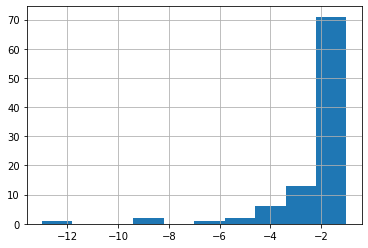

In [81]:
#Verificando casos negativos
ocupacao_[ocupacao_.saidaConfirmadaAltas < 0].saidaConfirmadaAltas.hist()

In [82]:
ocupacao_.saidaConfirmadaAltas = ocupacao_.saidaConfirmadaAltas.abs()

## origem

In [89]:
ocupacao_.origem.value_counts()

parse-cloud              516325
RPA-SP                   152334
RPA-RS                    82294
RPA-GO                    67245
RPA-MT                    32807
RPA-MS                    25596
RPA-RN                    10567
RPA-PR-CURITIBA            4186
RPA-MG-BELO-HORIZONTE      3239
RPA-PR                      556
aplicacao-web               512
RPA-CE                      241
RPA-MG                       44
Name: origem, dtype: int64

In [85]:
#Vamos remover essa coluna
ocupacao_ = ocupacao_.drop(columns="origem")

## _p_usuario

In [87]:
ocupacao_._p_usuario.value_counts()

_User$HzwsO90KQW    406360
_User$ux6JvPP5y5     11816
_User$2AD2T8d35K       506
_User$bDC0bgACvy       487
_User$H5OoJAmv1D       459
                     ...  
_User$DJ7qhDmM0E         1
_User$CyHEbPr0XX         1
_User$vc9JojlEQu         1
_User$1d2OQUoORs         1
_User$HmQB6QiwVV         1
Name: _p_usuario, Length: 3421, dtype: int64

In [90]:
#Vamos remover essa coluna
ocupacao_ = ocupacao_.drop(columns="_p_usuario")

## estadoNotificacao

In [91]:
ocupacao_.estadoNotificacao.value_counts()

São Paulo              203616
Minas Gerais           124725
Rio Grande do Sul       90794
Goiás                   77821
Rio de Janeiro          46913
Pernambuco              41603
Paraná                  39654
Mato Grosso             37396
Santa Catarina          32316
Mato Grosso do Sul      31536
Bahia                   24851
Ceará                   22527
Maranhão                15883
Amazonas                15454
Rio Grande do Norte     14687
Pará                    11653
Piauí                   11273
Espírito Santo           9824
Tocantins                8420
Rondônia                 6981
Alagoas                  6567
Paraíba                  5940
Sergipe                  5075
Distrito Federal         4909
GOIAS                    1431
Amapá                     941
Acre                      829
Roraima                   698
Name: estadoNotificacao, dtype: int64

In [95]:
#O estado do Goias, por exemplo, aparece de duas formas distintas. Vamos fazer a alteração para remover acentos e deixar tudo com letras minusculas
ocupacao_.estadoNotificacao.str.lower().apply(lambda x: unidecode.unidecode(x)).value_counts()

sao paulo              203616
minas gerais           124725
rio grande do sul       90794
goias                   79252
rio de janeiro          46913
pernambuco              41603
parana                  39654
mato grosso             37396
santa catarina          32316
mato grosso do sul      31536
bahia                   24851
ceara                   22527
maranhao                15883
amazonas                15454
rio grande do norte     14687
para                    11653
piaui                   11273
espirito santo           9824
tocantins                8420
rondonia                 6981
alagoas                  6567
paraiba                  5940
sergipe                  5075
distrito federal         4909
amapa                     941
acre                      829
roraima                   698
Name: estadoNotificacao, dtype: int64

In [96]:
ocupacao_.estadoNotificacao = ocupacao_.estadoNotificacao.str.lower().apply(lambda x: unidecode.unidecode(x))

## estado

In [111]:
ocupacao_.estado.value_counts()

São Paulo              203616
Minas Gerais           124723
Rio Grande do Sul       90793
Goiás                   77822
Rio de Janeiro          46913
Pernambuco              41603
Paraná                  39653
Mato Grosso             37397
Santa Catarina          32315
Mato Grosso do Sul      31537
Bahia                   24851
Ceará                   22527
Maranhão                15882
Amazonas                15457
Rio Grande do Norte     14687
Pará                    11653
Piauí                   11273
Espírito Santo           9824
Tocantins                8421
Rondônia                 6981
Alagoas                  6567
Paraíba                  5940
Sergipe                  5073
Distrito Federal         4908
GOIAS                    1431
Amapá                     941
Acre                      830
Roraima                   698
                            1
Name: estado, dtype: int64

In [112]:
#A coluna estado está repetida. Vamos remover
ocupacao_ = ocupacao_.drop(columns = "estado")

## municipio 

In [113]:
ocupacao_.municipio.value_counts()

São Paulo            32693
Rio de Janeiro       17823
Goiânia              17355
Manaus                9659
Recife                8690
                     ...  
Antonina do Norte        1
Jacarezinho              1
Pindoretama              1
Salitre                  1
                         1
Name: municipio, Length: 2331, dtype: int64

In [116]:
#A coluna municipio está repetida. Vamos remover
ocupacao_ = ocupacao_.drop(columns = "municipio")

## municipioNotificacao

In [97]:
ocupacao_.municipioNotificacao.value_counts()

São Paulo          32693
Rio de Janeiro     17823
Goiânia            17355
Manaus              9657
Recife              8690
                   ...  
Carmo da Mata          1
Catarina               1
Anita Garibaldi        1
Beberibe               1
Siqueira Campos        1
Name: municipioNotificacao, Length: 2330, dtype: int64

In [98]:
#Façamos a mesma conversão para minuscula e removendo acentuações
ocupacao_.municipioNotificacao = ocupacao_.municipioNotificacao.str.lower().apply(lambda x: unidecode.unidecode(x))

## excluido

In [100]:
ocupacao_.excluido.value_counts()

False    893810
True        507
Name: excluido, dtype: int64

## validado

In [102]:
#Essa coluna possui somente valores False. Vamos remover essa coluna
ocupacao_.validado.value_counts()

False    894317
Name: validado, dtype: int64

In [103]:
ocupacao_ = ocupacao_.drop(columns = "validado")

## _created_at

In [105]:
ocupacao_._created_at.describe()

C:\Users\ohbto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                         894317
unique                        894291
top       2021-03-15 01:31:59.941000
freq                               2
first     2020-04-15 13:44:30.085000
last      2021-05-31 00:56:13.558000
Name: _created_at, dtype: object

## _updated_at

In [108]:
ocupacao_._updated_at.describe()

C:\Users\ohbto\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                         894317
unique                        894310
top       2021-01-07 13:25:56.888000
freq                               2
first     2020-04-15 17:35:07.999000
last      2021-05-31 00:56:13.558000
Name: _updated_at, dtype: object

# Salvando os dados

In [117]:
describe(ocupacao_)

Quantidade de linhas: 894317


variable            type  na na_pct  unique  \
0                     _id          object   0   0.0%  894317   
1         dataNotificacao  datetime64[ns]   0   0.0%  492977   
2                    cnes          object   0   0.0%    4013   
3     ocupacaoSuspeitoCli         float64   0   0.0%    1099   
4     ocupacaoSuspeitoUti         float64   0   0.0%     543   
5   ocupacaoConfirmadoCli         float64   0   0.0%     579   
6   ocupacaoConfirmadoUti         float64   0   0.0%     479   
7     saidaSuspeitaObitos         float64   0   0.0%     153   
8      saidaSuspeitaAltas         float64   0   0.0%     311   
9   saidaConfirmadaObitos         float64   0   0.0%     245   
10   saidaConfirmadaAltas         float64   0   0.0%     627   
11      estadoNotificacao          object   0   0.0%      27   
12   municipioNotificacao          object   0   0.0%    2091   
13               excluido            bool   0   0.0%       2   
14            _created_at  datetime64[ns]   0   0.0%  894291   
15            _updated_at  datetime64[ns]   0   0.0%  894310   

                           min                         quat25  \
0                            -                              -   
1          2020-01-01 02:00:00     2020-08-14 03:00:09.044000   
2                            -                              -   
3                          0.0                            0.0   
4                          0.0                            0.0   
5                          0.0                            0.0   
6                          0.0                            0.0   
7                          0.0                            0.0   
8                          0.0                            0.0   
9                          0.0                            0.0   
10                         0.0                            0.0   
11                           -                              -   
12                           -                              -   
13                       False                            0.0   
14  2020-04-15 13:44:30.085000  2020-08-20 08:27:25.913999872   
15  2020-04-15 17:35:07.999000  2020-08-29 08:22:12.767000064   

                           median                           mean  \
0                               -                              -   
1             2020-11-11 15:03:18  2020-11-15 08:24:57.117628416   
2                               -                              -   
3                             3.0                      24.195749   
4                             0.0                       7.581713   
5                             2.0                       7.822959   
6                             0.0                       6.165443   
7                             0.0                       0.218452   
8                             0.0                       0.805229   
9                             0.0                       0.528844   
10                            0.0                       1.582565   
11                              -                              -   
12                              -                              -   
13                            0.0                       0.000567   
14  2020-11-16 08:21:31.651000064  2020-11-20 18:21:09.103481344   
15     2020-11-17 08:21:02.104000  2020-12-01 10:53:13.567088896   

                           quat75                         max  \
0                               -                           -   
1   2021-02-22 22:53:04.969999872  2021-05-30 05:00:58.791000   
2                               -                           -   
3                            25.0                      3939.0   
4                             8.0                      1126.0   
5                             9.0                      1212.0   
6                             7.0                      2527.0   
7                             0.0                       425.0   
8                             0.0                      3020.0   
9              

In [118]:
write_table_from_pandas(ocupacao_,"../data/interim/ocupacao_leitos.parquet")